In [1]:
from pydub import AudioSegment
from pydub.utils import get_array_type
import os
import array
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio
from scipy.io import wavfile
from scipy.signal import butter, filtfilt
from PIL import Image


In [2]:
# uesed it to create 2 mono files
from pydub import AudioSegment
sound = AudioSegment.from_mp3('voyager.mp3')
mono_audios = sound.split_to_mono()
mono_left = mono_audios[0].export(
    "D:\Git\Voyager_Golden_Record\\mono_left.wav",
    format="wav")
mono_right = mono_audios[1].export(
    "D:\Git\Voyager_Golden_Record\\mono_right.wav",
    format="wav")

In [3]:
#working from the mp3
sound = AudioSegment.from_mp3('voyager.mp3')

#check this out to get better stuff
left = sound.split_to_mono()[0]
bit_depth = left.sample_width * 8
array_type = get_array_type(bit_depth)

numeric_array = array.array(array_type, left._data)
data = numeric_array
from pydub.utils import mediainfo
info = mediainfo('voyager.mp3')
print(info['sample_rate'])
samplerate = int(info['sample_rate'])
print(samplerate)

44100
44100


In [4]:
# binary number that repesent the length of each wave
WavelengthInBinary = '101101001100000000000000'
WavelengthInDec = int(WavelengthInBinary, 2)
print(f"should be {WavelengthInDec} ")
a = 11845632/300000 
print (a)
# ToDo: find what are the units for this time 11845632 

should be 11845632 
39.48544


In [5]:
 #apper on the disk as lines in second image, apper to be the number of col per image
NumberOfWavesInBinary = '1000000000'
NumberOfWavesInDec = int(NumberOfWavesInBinary, 2)
print(f"should be {NumberOfWavesInDec} col im image")

should be 512 col im image


In [6]:
wav_fname = "D:\Git\Voyager_Golden_Record\mono_left.wav"
samplerate, data = wavfile.read(wav_fname);  # Reading the audio file
t = np.arange(len(data)) / float(samplerate);  # Retrieving Time

print("data -> ", data)
print("data length -> ", len(data))
print("np.arange(len(data)) -> ", np.arange(len(data)))
print("float(samplerate) -> ", float(samplerate))
print("time -> ", t)

data = data/max(data);  # Normalize Audio Data
print("normalized data -> ", data)

#data = data [0:11845632]

print (data.shape[0])
print (samplerate)


data ->  [-3 -4 -2 ...  7  6  4]
data length ->  41794099
np.arange(len(data)) ->  [       0        1        2 ... 41794096 41794097 41794098]
float(samplerate) ->  44100.0
time ->  [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 9.47711927e+02
 9.47711950e+02 9.47711973e+02]
normalized data ->  [-0.00031606 -0.00042141 -0.0002107  ...  0.00073746  0.00063211
  0.00042141]
41794099
44100


In [7]:
import pywt
cA, cD = pywt.dwt(data,'haar','per')
cD = cD*0
y = pywt.idwt(cA,cD,'haar','per')

In [8]:

#signal = data[offset+30*samplerate:offset+int(samplerate*30.5)]
def GetPeriodEstimate(signal):
    import pylab as plt
    import numpy as np
    import scipy as sp

    N = len(signal)

    # Compute the FFT
    W    = np.fft.fft(signal)
    freq = np.fft.fftfreq(N,1)
    
    # Look for the longest signal that is "loud"
    threshold = 10**2
    idx = np.where(abs(W)>threshold)[0][-1]

    max_f = abs(freq[idx])
    Period_estimate = round(1/max_f)
    # if(Period_estimate>800):
    #     Period_estimate = round(Period_estimate/2)
    #print ("Period estimate: ", Period_estimate)
    return 735

In [9]:
def GetOffset():
    samplerate = 44100
    offset = [31.25,43.25,55.45,67.35,79,90.7]
    offset = [int(val*samplerate) for val in offset]
    for i in range(10,50):
        index = i*11.89714286  + 31.25 
        offset.append(int(samplerate*index ))
    offset_time = [val/samplerate for val in offset]
    #print(offset_time)
    return offset

In [10]:
def GetBuffer():
     Buffer_padding = [1]*40
     Buffer=  [50,500,450,500,300,200,600,600,300]
     Buffer = Buffer + Buffer_padding
     #print(Buffer)
     return Buffer

41794100
[50, 500, 450, 500, 300, 200, 600, 600, 300, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1554525
1576575
50


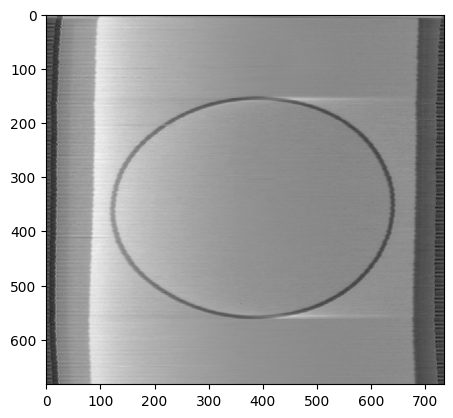

2083725
2105775
500


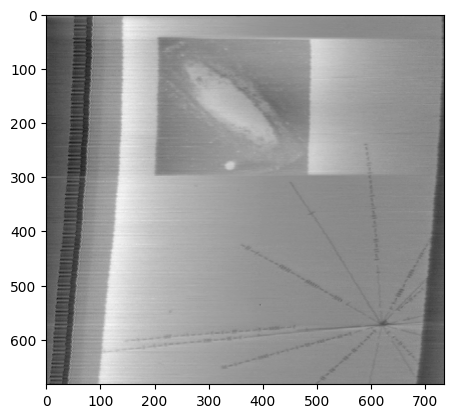

2621745
2643795
450


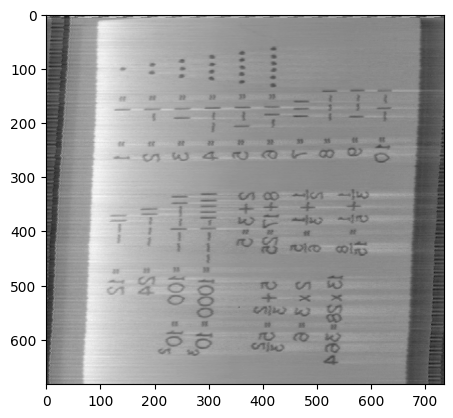

3146534
3168584
500


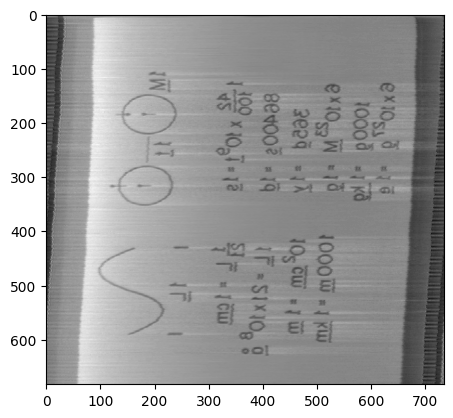

3660300
3682350
300


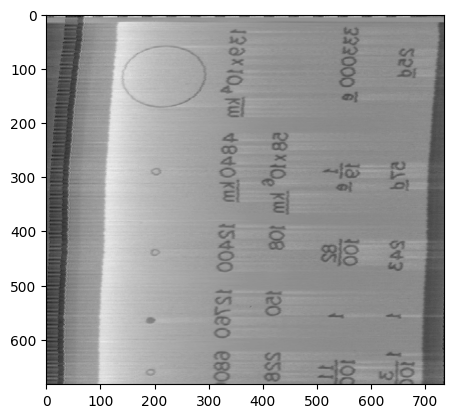

4176270
4198320
200


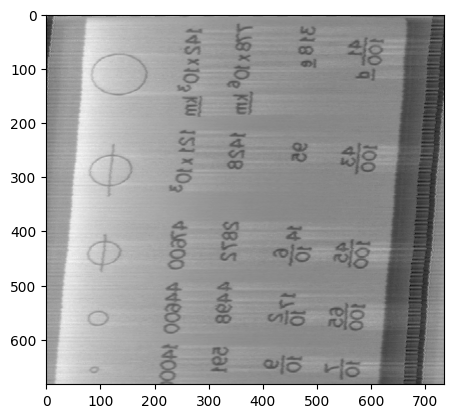

6801165
6823215
600


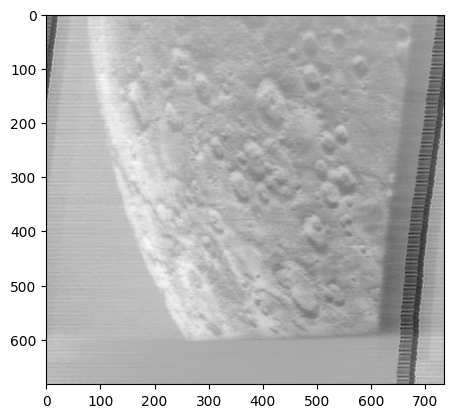

7325829
7347879
600


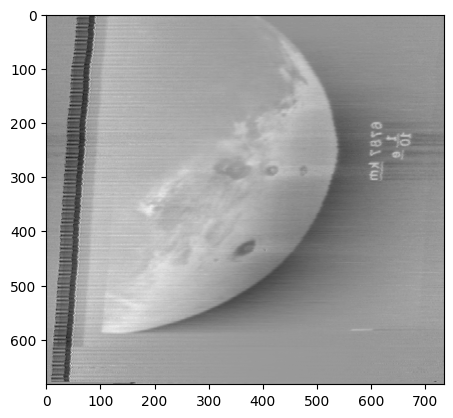

7850493
7872543
300


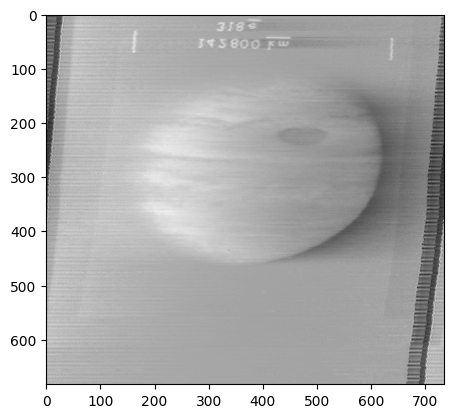

8375157
8397207
1


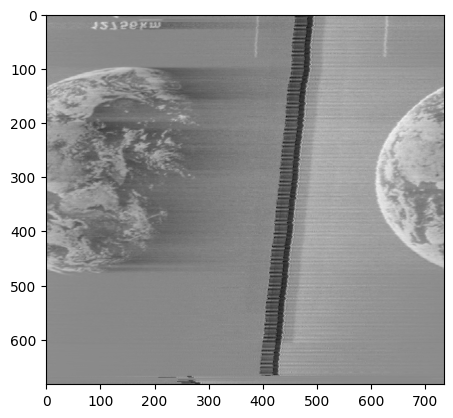

8899821
8921871
1


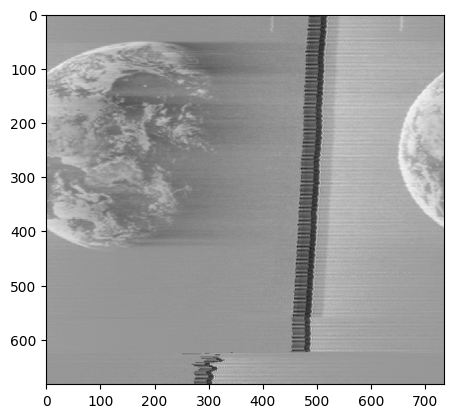

9424485
9446535
1


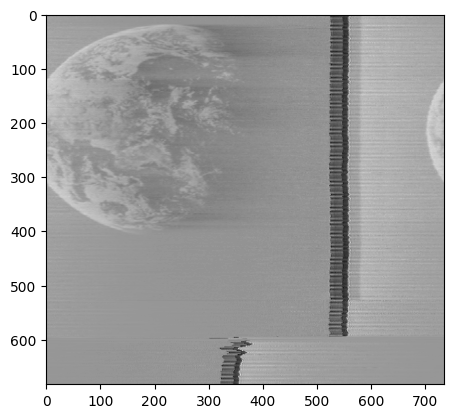

9949149
9971199
1


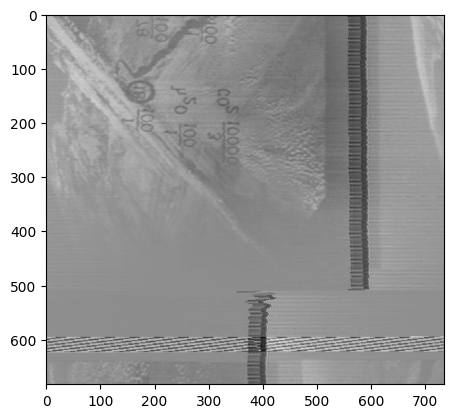

10473813
10495863
1


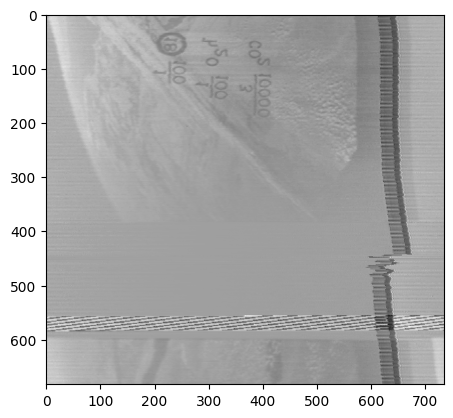

10998477
11020527
1


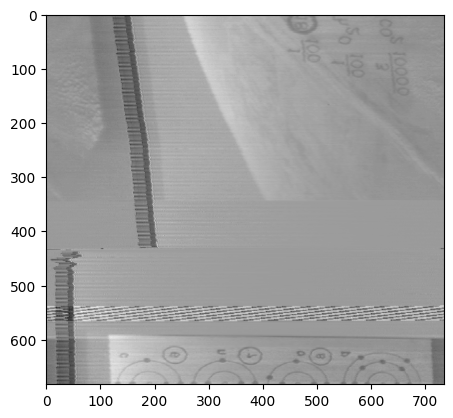

11523141
11545191
1


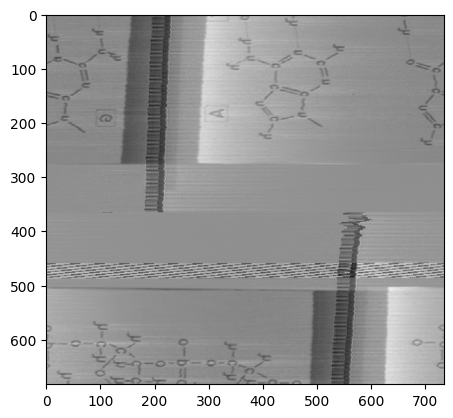

12047805
12069855
1


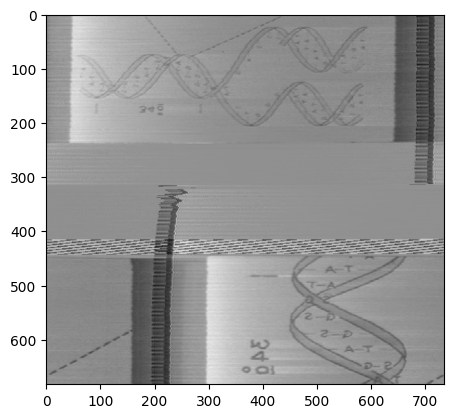

12572469
12594519
1


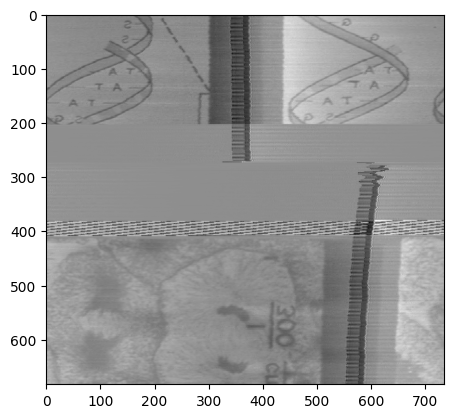

13097133
13119183
1


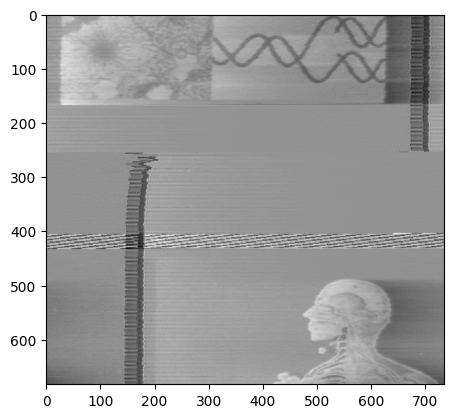

13621797
13643847
1


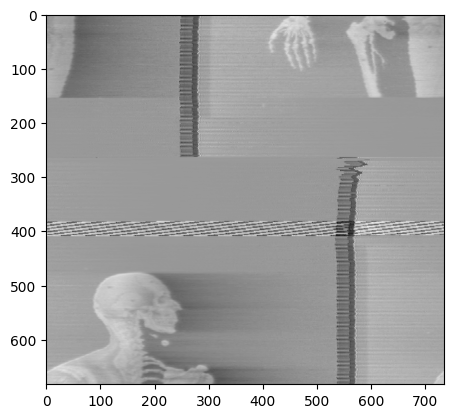

14146461
14168511
1


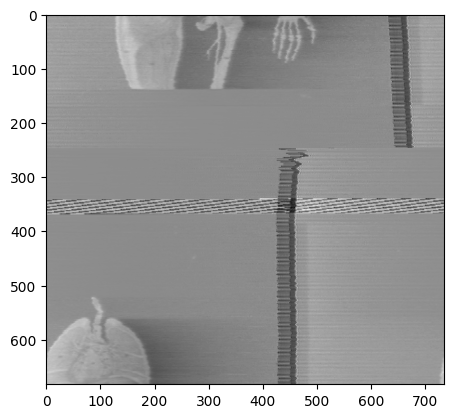

14671125
14693175
1


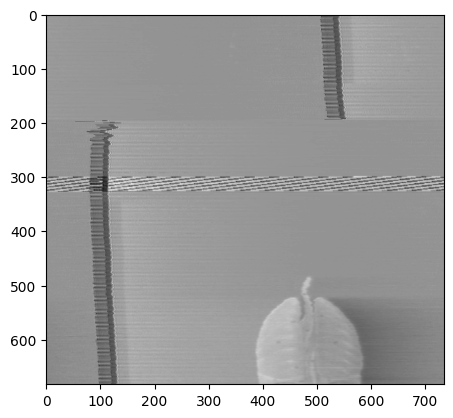

15195789
15217839
1


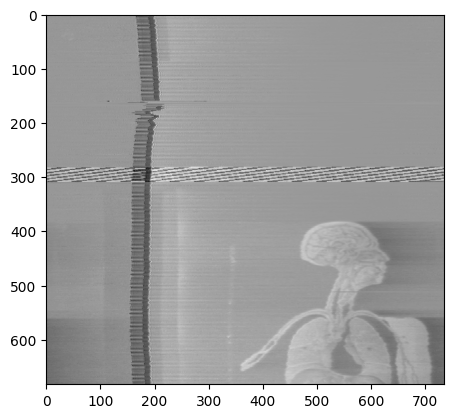

15720453
15742503
1


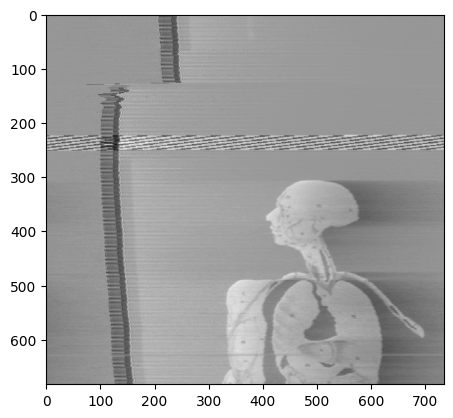

16245117
16267167
1


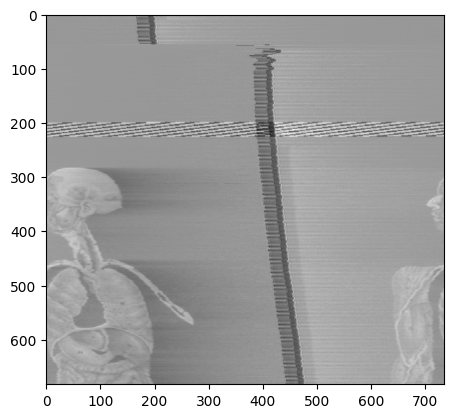

16769781
16791831
1


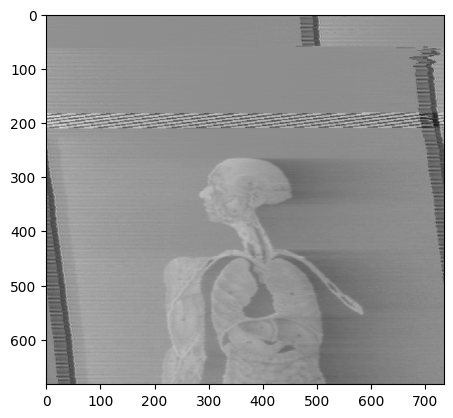

17294445
17316495
1


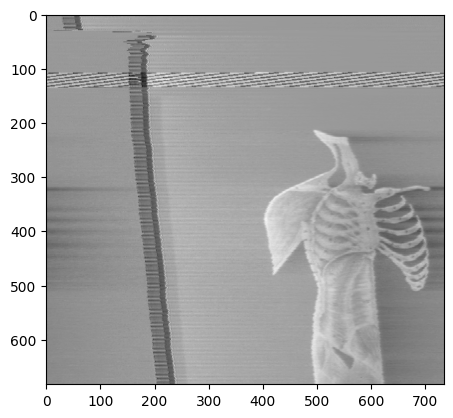

17819109
17841159
1


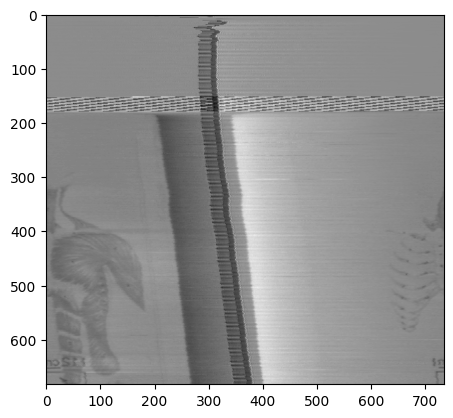

18343773
18365823
1


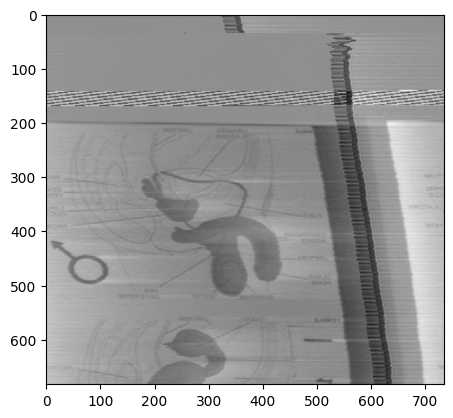

18868437
18890487
1


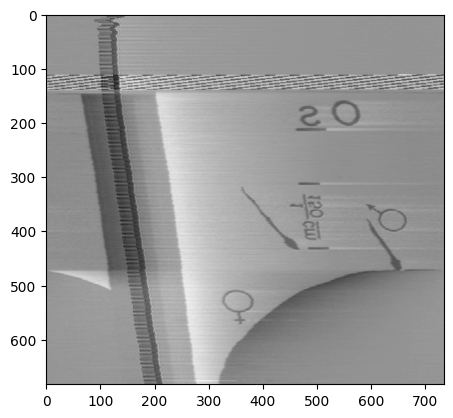

19393101
19415151
1


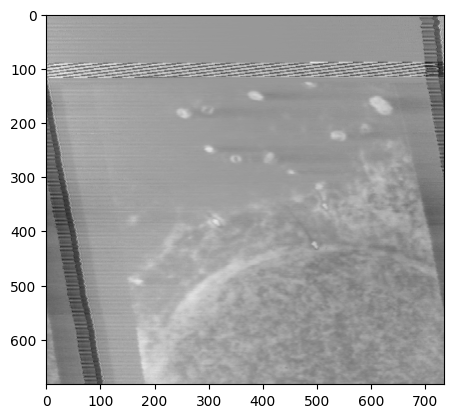

19917765
19939815
1


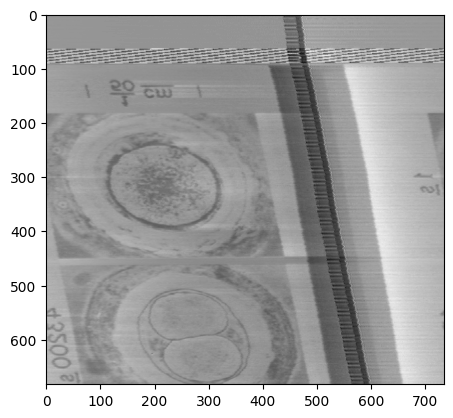

20442429
20464479
1


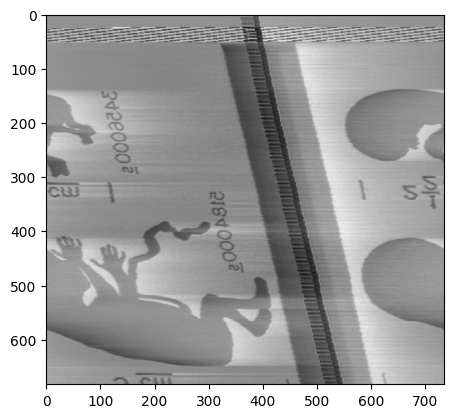

20967093
20989143
1


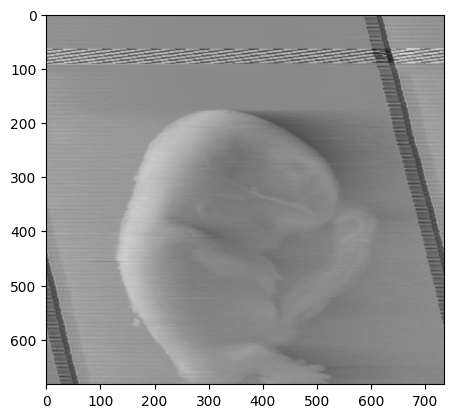

21491757
21513807
1


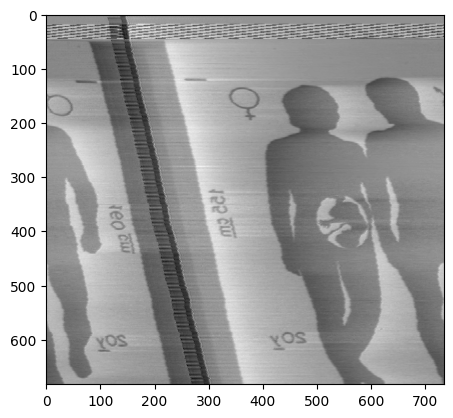

22016421
22038471
1


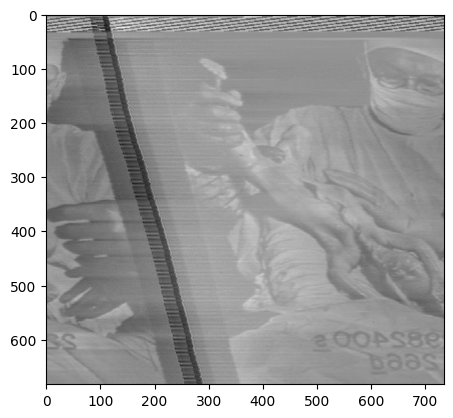

22541085
22563135
1


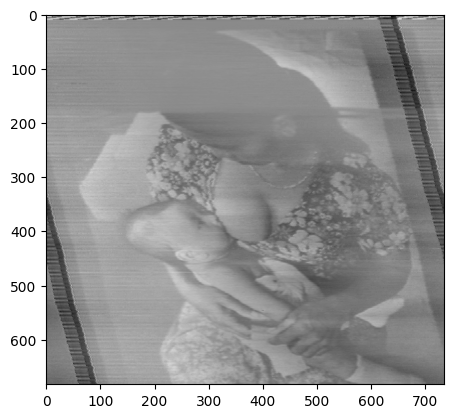

23065749
23087799
1


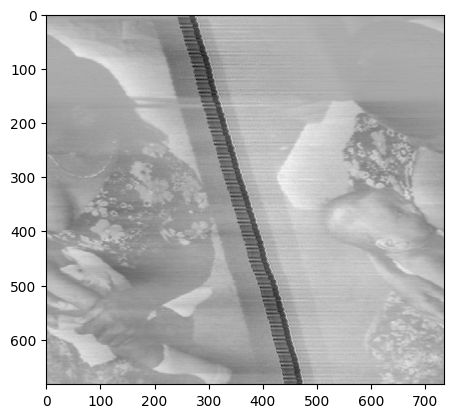

23590413
23612463
1


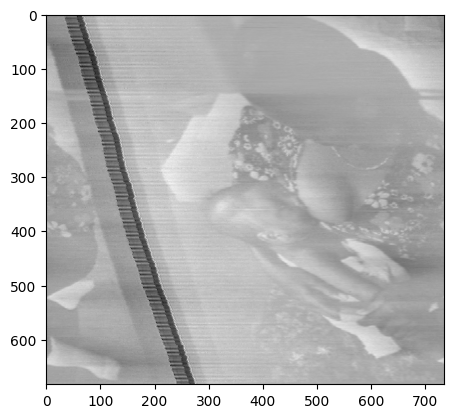

24115077
24137127
1


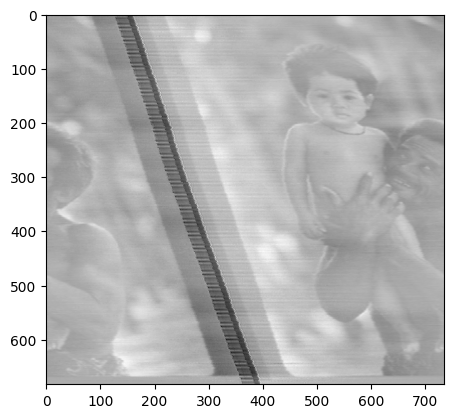

24639741
24661791
1


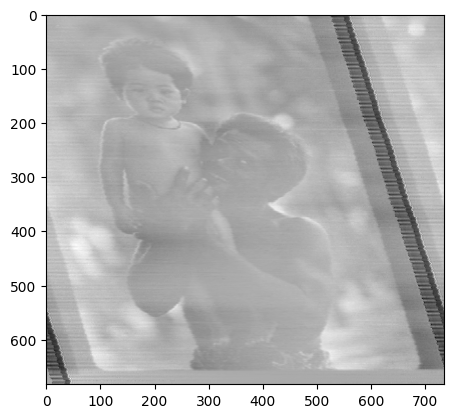

25164405
25186455
1


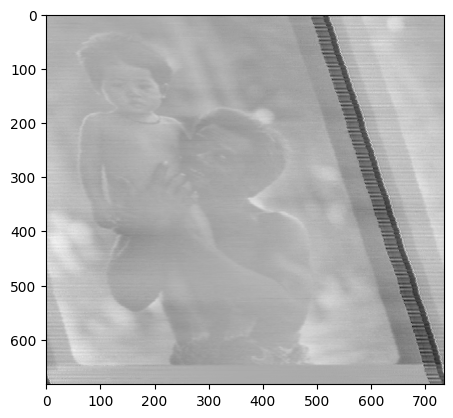

25689069
25711119
1


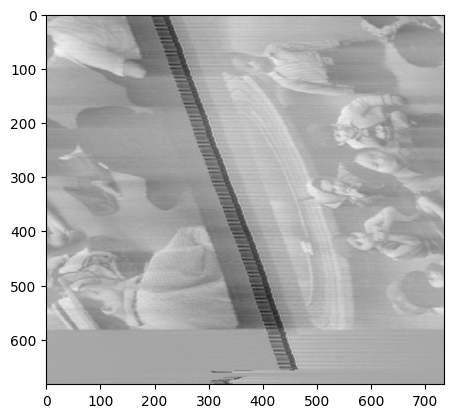

26213733
26235783
1


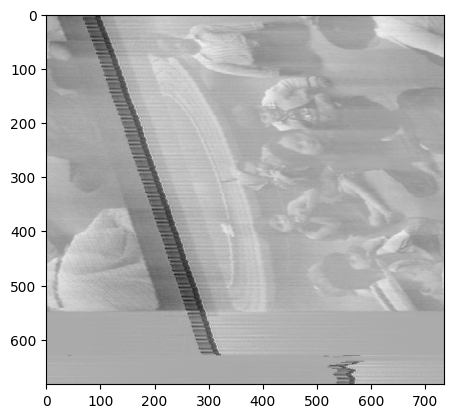

26738397
26760447
1


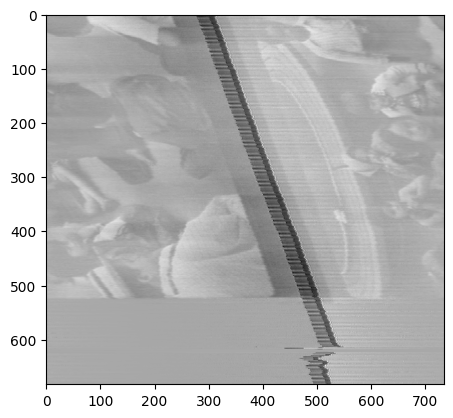

27263061
27285111
1


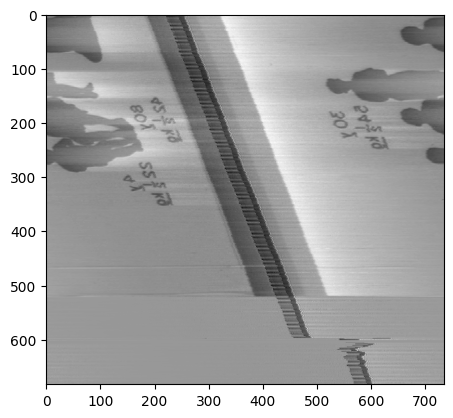

<Figure size 640x480 with 0 Axes>

In [11]:
image_data = []
print(len(y))
window_size = 735
line_hz = samplerate / (window_size)
nyquist = samplerate / 2
Wn = line_hz / nyquist
#window = np.zeros([1,window_size])
#offset = int(samplerate*149.6) #start time
#print(f" offset:{offset}" )
adjust = 0
const = 0
#offset = int(samplerate*(SignalTime + 31.25)) #start time
offset_list = GetOffset() 
Buffer_list = GetBuffer()
print(Buffer_list)
for offset in offset_list:
    image_data = []
    # Find peaks in the signal
    signal = y[offset+4*samplerate:offset+int(samplerate*4.5)]  
    print(offset+4*samplerate)
    print(offset+int(4.5*samplerate))
    buffer = Buffer_list[const]
    const +=1 

    window_size = GetPeriodEstimate(signal)
    for index in range(512):
        b, a = butter(3, Wn, 'highpass',analog='true')
        adjust = int(index *(-.55-0.02618*const))

        window = y[offset + buffer + adjust :offset+window_size + buffer + adjust]
        x = filtfilt(b, a, window)
        w = np.clip(x,-2500,2500)
        image_data.append(-1*w[0:len(w)])
        if(index%3 == 0):
            image_data.append(-1*w[0:len(w)])

        #image_data.append(-0.5*window[0:len(window)])
        offset = offset + window_size
        # plt.plot(range(len(window)),window[:])
        # plt.show()


    #image_data=np.stack(image_data) 
    #image_data=255/2* (image_data/image_data.max()) + 255/2
    #image_data=image_data.astype('uint8')  
    print(buffer)
    plt.imshow(image_data,cmap="gray")
    plt.ion()
    plt.show()
    plt.pause(0.1)
    plt.ioff()
    plt.clf()